### Importing Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')

plt.style.use('fivethirtyeight')
%matplotlib inline
pd.set_option('display.max_columns', 26)

In [2]:
path = "kidney_dataset.csv"

### Reading the dataset

In [3]:
df = pd.read_csv(path)
df.head()

id   age    bp     sg   al   su     rbc        pc         pcc          ba  \
0   0  48.0  80.0  1.020  1.0  0.0     NaN    normal  notpresent  notpresent   
1   1   7.0  50.0  1.020  4.0  0.0     NaN    normal  notpresent  notpresent   
2   2  62.0  80.0  1.010  2.0  3.0  normal    normal  notpresent  notpresent   
3   3  48.0  70.0  1.005  4.0  0.0  normal  abnormal     present  notpresent   
4   4  51.0  80.0  1.010  2.0  0.0  normal    normal  notpresent  notpresent   

     bgr    bu   sc    sod  pot  hemo pcv    wc   rc  htn   dm cad appet   pe  \
0  121.0  36.0  1.2    NaN  NaN  15.4  44  7800  5.2  yes  yes  no  good   no   
1    NaN  18.0  0.8    NaN  NaN  11.3  38  6000  NaN   no   no  no  good   no   
2  423.0  53.0  1.8    NaN  NaN   9.6  31  7500  NaN   no  yes  no  poor   no   
3  117.0  56.0  3.8  111.0  2.5  11.2  32  6700  3.9  yes   no  no  poor  yes   
4  106.0  26.0  1.4    NaN  NaN  11.6  35  7300  4.6   no   no  no  good   no   

   ane classification  
0   no            ckd  
1   no            ckd  
2  yes            ckd  
3  yes            ckd  
4   no            ckd

In [4]:
df.shape

(400, 26)

In [5]:
df.drop('id', axis = 1, inplace = True)

In [6]:
df.columns = ['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar', 'red_blood_cells', 'pus_cell',
              'pus_cell_clumps', 'bacteria', 'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium',
              'potassium', 'haemoglobin', 'packed_cell_volume', 'white_blood_cell_count', 'red_blood_cell_count',
              'hypertension', 'diabetes_mellitus', 'coronary_artery_disease', 'appetite', 'peda_edema',
              'aanemia', 'class']

In [7]:
df.head()

age  blood_pressure  specific_gravity  albumin  sugar red_blood_cells  \
0  48.0            80.0             1.020      1.0    0.0             NaN   
1   7.0            50.0             1.020      4.0    0.0             NaN   
2  62.0            80.0             1.010      2.0    3.0          normal   
3  48.0            70.0             1.005      4.0    0.0          normal   
4  51.0            80.0             1.010      2.0    0.0          normal   

   pus_cell pus_cell_clumps    bacteria  blood_glucose_random  blood_urea  \
0    normal      notpresent  notpresent                 121.0        36.0   
1    normal      notpresent  notpresent                   NaN        18.0   
2    normal      notpresent  notpresent                 423.0        53.0   
3  abnormal         present  notpresent                 117.0        56.0   
4    normal      notpresent  notpresent                 106.0        26.0   

   serum_creatinine  sodium  potassium  haemoglobin packed_cell_volume  \
0               1.2     NaN        NaN         15.4                 44   
1               0.8     NaN        NaN         11.3                 38   
2               1.8     NaN        NaN          9.6                 31   
3               3.8   111.0        2.5         11.2                 32   
4               1.4     NaN        NaN         11.6                 35   

  white_blood_cell_count red_blood_cell_count hypertension diabetes_mellitus  \
0                   7800                  5.2          yes               yes   
1                   6000                  NaN           no                no   
2                   7500                  NaN           no               yes   
3                   6700                  3.9          yes                no   
4                   7300                  4.6           no                no   

  coronary_artery_disease appetite peda_edema aanemia class  
0                      no     good         no      no   ckd  
1                      no     good         no      no   ckd  
2                      no     poor         no     yes   ckd  
3                      no     poor        yes     yes   ckd  
4                      no     good         no      no   ckd

In [8]:
df.describe()

age  blood_pressure  specific_gravity     albumin       sugar  \
count  391.000000      388.000000        353.000000  354.000000  351.000000   
mean    51.483376       76.469072          1.017408    1.016949    0.450142   
std     17.169714       13.683637          0.005717    1.352679    1.099191   
min      2.000000       50.000000          1.005000    0.000000    0.000000   
25%     42.000000       70.000000          1.010000    0.000000    0.000000   
50%     55.000000       80.000000          1.020000    0.000000    0.000000   
75%     64.500000       80.000000          1.020000    2.000000    0.000000   
max     90.000000      180.000000          1.025000    5.000000    5.000000   

       blood_glucose_random  blood_urea  serum_creatinine      sodium  \
count            356.000000  381.000000        383.000000  313.000000   
mean             148.036517   57.425722          3.072454  137.528754   
std               79.281714   50.503006          5.741126   10.408752   
min               22.000000    1.500000          0.400000    4.500000   
25%               99.000000   27.000000          0.900000  135.000000   
50%              121.000000   42.000000          1.300000  138.000000   
75%              163.000000   66.000000          2.800000  142.000000   
max              490.000000  391.000000         76.000000  163.000000   

        potassium  haemoglobin  
count  312.000000   348.000000  
mean     4.627244    12.526437  
std      3.193904     2.912587  
min      2.500000     3.100000  
25%      3.800000    10.300000  
50%      4.400000    12.650000  
75%      4.900000    15.000000  
max     47.000000    17.800000

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      391 non-null    float64
 1   blood_pressure           388 non-null    float64
 2   specific_gravity         353 non-null    float64
 3   albumin                  354 non-null    float64
 4   sugar                    351 non-null    float64
 5   red_blood_cells          248 non-null    object 
 6   pus_cell                 335 non-null    object 
 7   pus_cell_clumps          396 non-null    object 
 8   bacteria                 396 non-null    object 
 9   blood_glucose_random     356 non-null    float64
 10  blood_urea               381 non-null    float64
 11  serum_creatinine         383 non-null    float64
 12  sodium                   313 non-null    float64
 13  potassium                312 non-null    float64
 14  haemoglobin              3

In [10]:
# converting necessary columns to numerical type

df['packed_cell_volume'] = pd.to_numeric(df['packed_cell_volume'], errors='coerce')
df['white_blood_cell_count'] = pd.to_numeric(df['white_blood_cell_count'], errors='coerce')
df['red_blood_cell_count'] = pd.to_numeric(df['red_blood_cell_count'], errors='coerce')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      391 non-null    float64
 1   blood_pressure           388 non-null    float64
 2   specific_gravity         353 non-null    float64
 3   albumin                  354 non-null    float64
 4   sugar                    351 non-null    float64
 5   red_blood_cells          248 non-null    object 
 6   pus_cell                 335 non-null    object 
 7   pus_cell_clumps          396 non-null    object 
 8   bacteria                 396 non-null    object 
 9   blood_glucose_random     356 non-null    float64
 10  blood_urea               381 non-null    float64
 11  serum_creatinine         383 non-null    float64
 12  sodium                   313 non-null    float64
 13  potassium                312 non-null    float64
 14  haemoglobin              3

In [12]:
# Extracting categorical and numerical columns

cat_cols = [col for col in df.columns if df[col].dtype == 'object']
num_cols = [col for col in df.columns if df[col].dtype != 'object']

In [13]:
# looking at unique values in categorical columns

for col in cat_cols:
    print(f"{col} has {df[col].unique()} values\n")

red_blood_cells has [nan 'normal' 'abnormal'] values

pus_cell has ['normal' 'abnormal' nan] values

pus_cell_clumps has ['notpresent' 'present' nan] values

bacteria has ['notpresent' 'present' nan] values

hypertension has ['yes' 'no' nan] values

diabetes_mellitus has ['yes' 'no' ' yes' '\tno' '\tyes' nan] values

coronary_artery_disease has ['no' 'yes' '\tno' nan] values

appetite has ['good' 'poor' nan] values

peda_edema has ['no' 'yes' nan] values

aanemia has ['no' 'yes' nan] values

class has ['ckd' 'ckd\t' 'notckd'] values



In [14]:
# replace incorrect values

df['diabetes_mellitus'].replace(to_replace = {'\tno':'no','\tyes':'yes',' yes':'yes'},inplace=True)

df['coronary_artery_disease'] = df['coronary_artery_disease'].replace(to_replace = '\tno', value='no')

df['class'] = df['class'].replace(to_replace = {'ckd\t': 'ckd', 'notckd': 'not ckd'})

In [15]:
df['class'] = df['class'].map({'ckd': 0, 'not ckd': 1})
df['class'] = pd.to_numeric(df['class'], errors='coerce')

In [16]:
cols = ['diabetes_mellitus', 'coronary_artery_disease', 'class']

for col in cols:
    print(f"{col} has {df[col].unique()} values\n")

diabetes_mellitus has ['yes' 'no' nan] values

coronary_artery_disease has ['no' 'yes' nan] values

class has [0 1] values



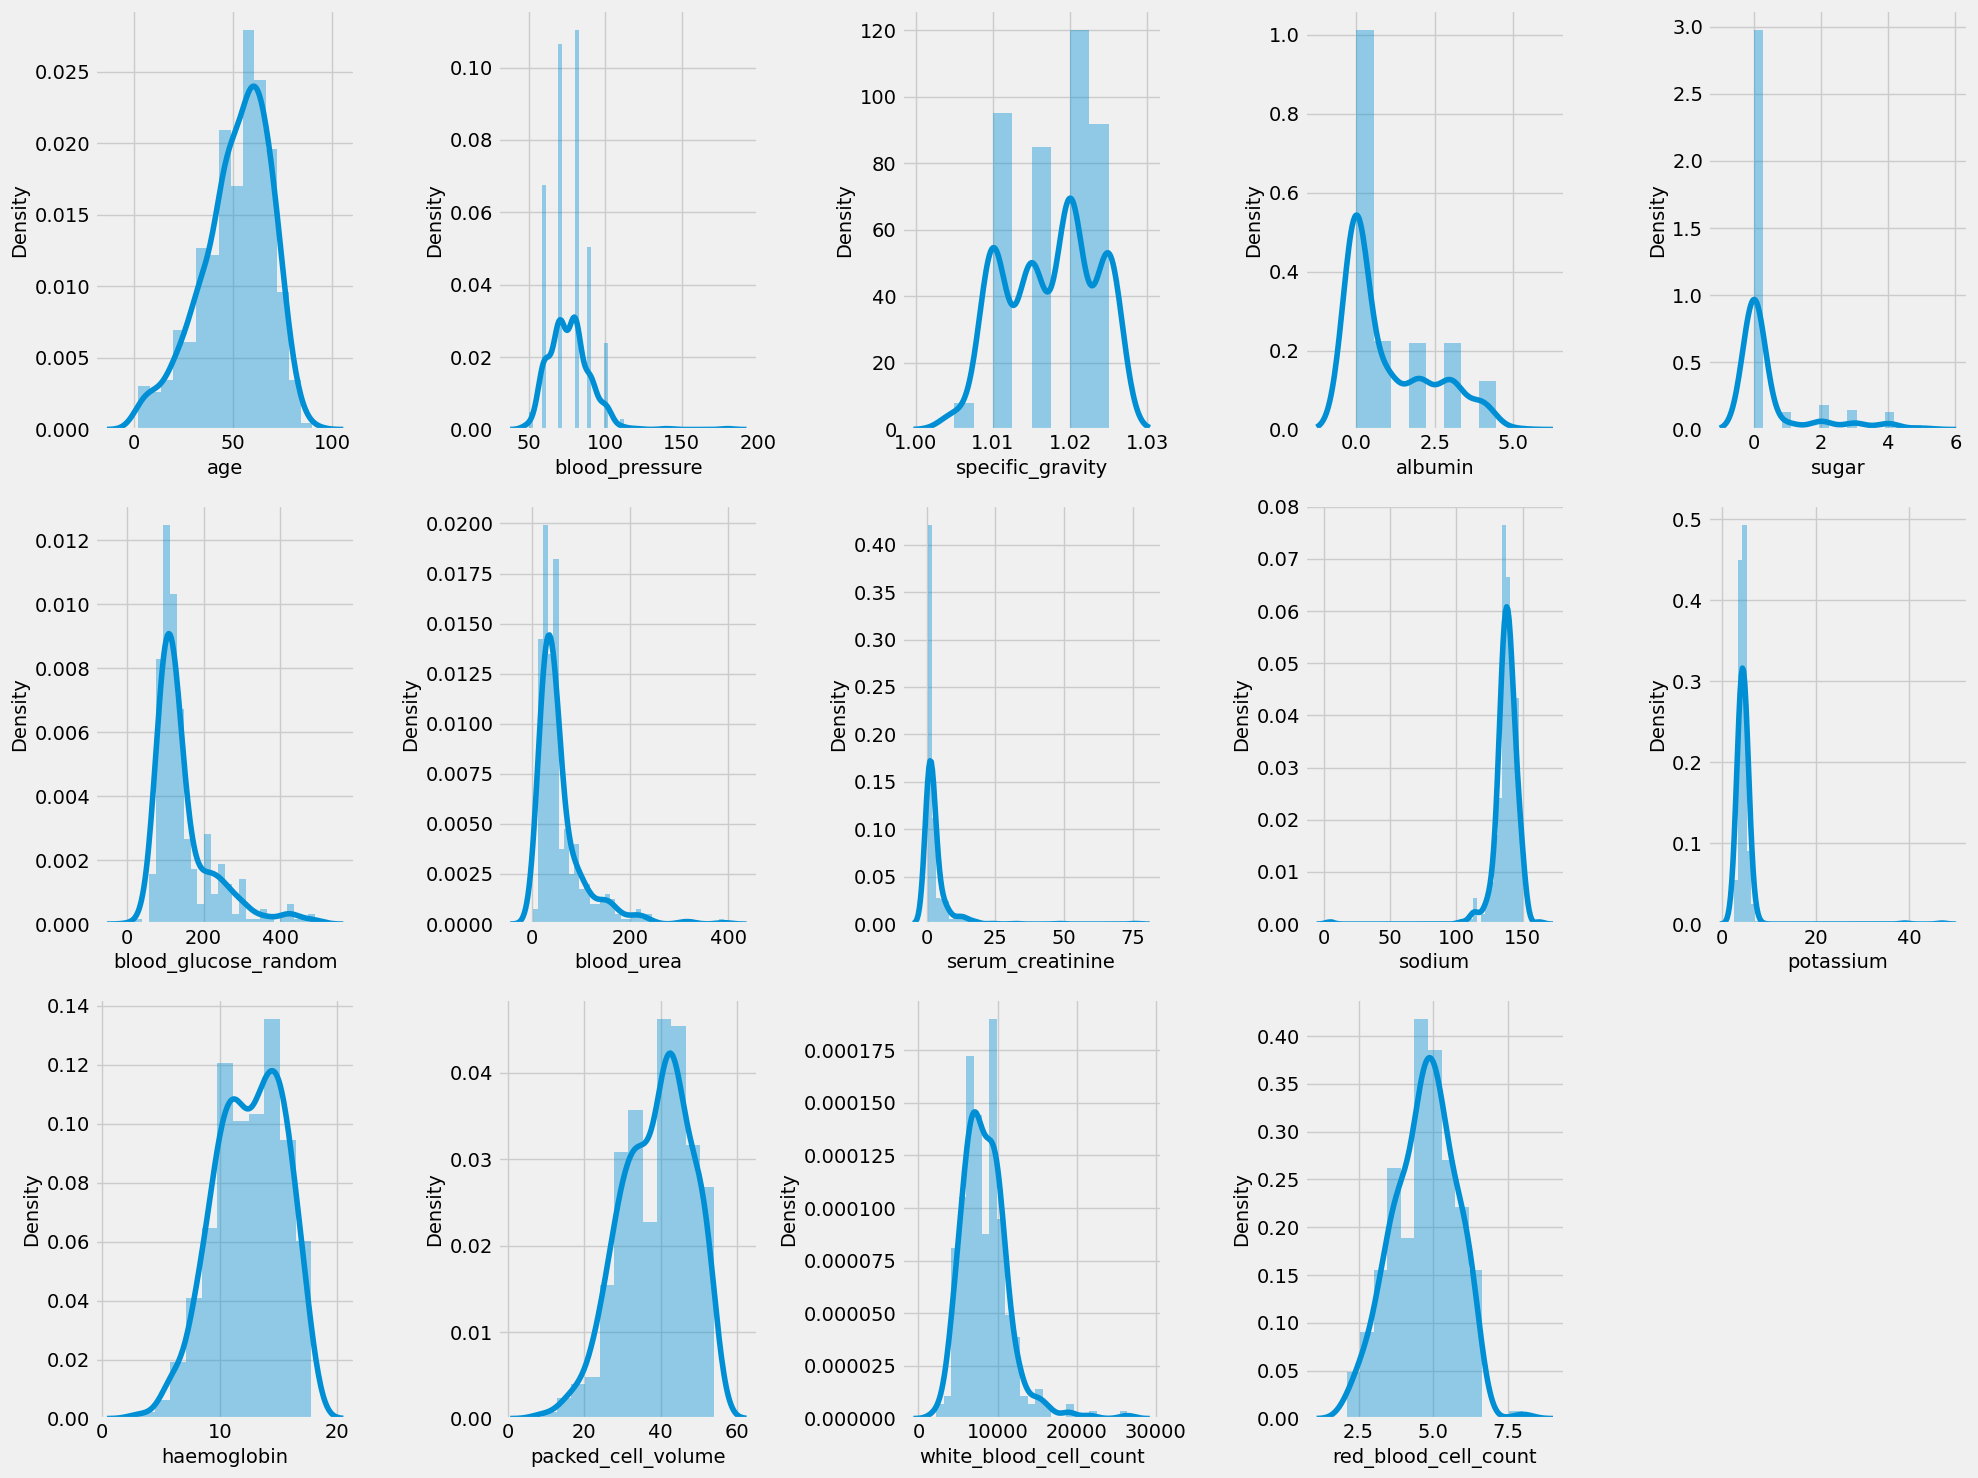

In [17]:
# checking numerical features distribution

plt.figure(figsize = (20, 15))
plotnumber = 1

for column in num_cols:
    if plotnumber <= 14:
        ax = plt.subplot(3, 5, plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column)
        
    plotnumber += 1

plt.tight_layout()
plt.show()

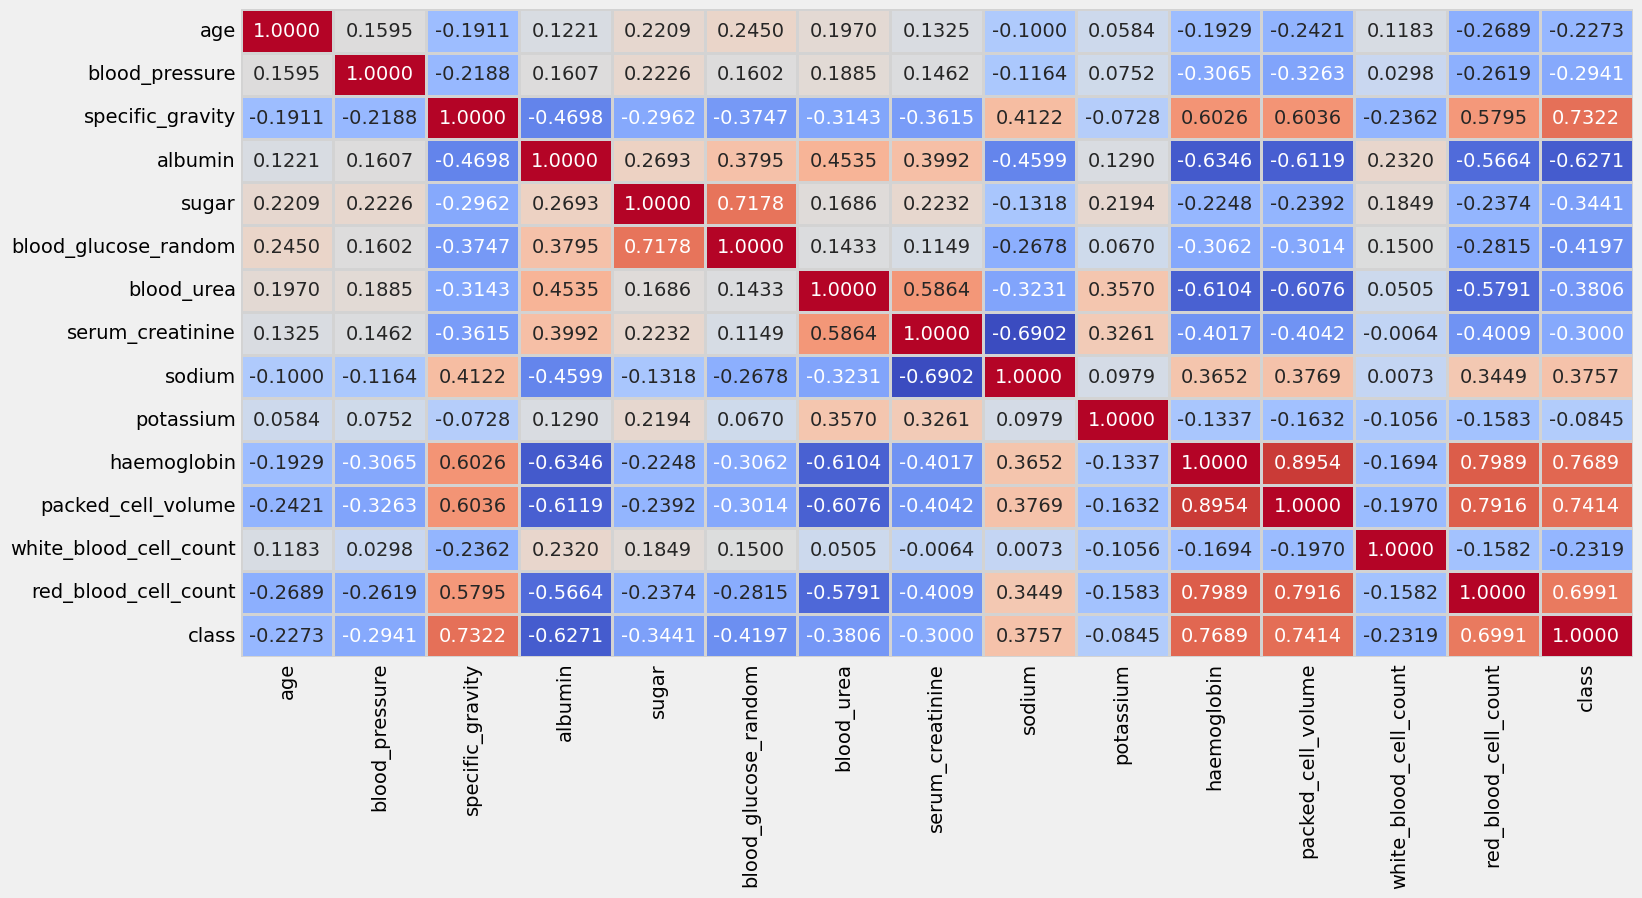

<Figure size 640x480 with 0 Axes>

In [18]:
# heatmap of data


fig, ax = plt.subplots(figsize = (16, 8))
sns.heatmap(df.corr(), annot = True, linewidths = 2, linecolor = 'lightgrey',fmt='.4f', 
            cmap=plt.get_cmap('coolwarm'), cbar=False, ax=ax)
ax.set_yticklabels(ax.get_yticklabels(), rotation="horizontal")
plt.show()
plt.savefig('corr1.png', bbox_inches='tight', pad_inches=0.0)

In [19]:
correlations = df.corr()['class'].sort_values()

# Display correlations
print('Most Positive Correlations:\n', correlations.tail())
print('\nMost Negative Correlations:\n', correlations.head())
# Make a table

Most Positive Correlations:
 red_blood_cell_count    0.699089
specific_gravity        0.732163
packed_cell_volume      0.741427
haemoglobin             0.768919
class                   1.000000
Name: class, dtype: float64

Most Negative Correlations:
 albumin                -0.627090
blood_glucose_random   -0.419672
blood_urea             -0.380605
sugar                  -0.344070
serum_creatinine       -0.299969
Name: class, dtype: float64


In [20]:
df.columns

Index(['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar',
       'red_blood_cells', 'pus_cell', 'pus_cell_clumps', 'bacteria',
       'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium',
       'potassium', 'haemoglobin', 'packed_cell_volume',
       'white_blood_cell_count', 'red_blood_cell_count', 'hypertension',
       'diabetes_mellitus', 'coronary_artery_disease', 'appetite',
       'peda_edema', 'aanemia', 'class'],
      dtype='object')

### Data Preprocessing

In [21]:
# checking for null values

df.isna().sum().sort_values(ascending = False)

red_blood_cells            152
red_blood_cell_count       131
white_blood_cell_count     106
potassium                   88
sodium                      87
packed_cell_volume          71
pus_cell                    65
haemoglobin                 52
sugar                       49
specific_gravity            47
albumin                     46
blood_glucose_random        44
blood_urea                  19
serum_creatinine            17
blood_pressure              12
age                          9
bacteria                     4
pus_cell_clumps              4
hypertension                 2
diabetes_mellitus            2
coronary_artery_disease      2
appetite                     1
peda_edema                   1
aanemia                      1
class                        0
dtype: int64

In [22]:
df[num_cols].isnull().sum()

age                         9
blood_pressure             12
specific_gravity           47
albumin                    46
sugar                      49
blood_glucose_random       44
blood_urea                 19
serum_creatinine           17
sodium                     87
potassium                  88
haemoglobin                52
packed_cell_volume         71
white_blood_cell_count    106
red_blood_cell_count      131
dtype: int64

In [23]:
df[cat_cols].isnull().sum()

red_blood_cells            152
pus_cell                    65
pus_cell_clumps              4
bacteria                     4
hypertension                 2
diabetes_mellitus            2
coronary_artery_disease      2
appetite                     1
peda_edema                   1
aanemia                      1
class                        0
dtype: int64

In [24]:
# filling null values, we will use two methods, random sampling for higher null values and 
# mean/mode sampling for lower null values

def random_value_imputation(feature):
    random_sample = df[feature].dropna().sample(df[feature].isna().sum())
    random_sample.index = df[df[feature].isnull()].index
    df.loc[df[feature].isnull(), feature] = random_sample
    
def impute_mode(feature):
    mode = df[feature].mode()[0]
    df[feature] = df[feature].fillna(mode)

In [25]:
# filling num_cols null values using random sampling method

for col in num_cols:
    random_value_imputation(col)

In [26]:
df[num_cols].isnull().sum()

age                       0
blood_pressure            0
specific_gravity          0
albumin                   0
sugar                     0
blood_glucose_random      0
blood_urea                0
serum_creatinine          0
sodium                    0
potassium                 0
haemoglobin               0
packed_cell_volume        0
white_blood_cell_count    0
red_blood_cell_count      0
dtype: int64

In [27]:
# filling "red_blood_cells" and "pus_cell" using random sampling method and rest of cat_cols using mode imputation

random_value_imputation('red_blood_cells')
random_value_imputation('pus_cell')

for col in cat_cols:
    impute_mode(col)

In [28]:
df[cat_cols].isnull().sum()

red_blood_cells            0
pus_cell                   0
pus_cell_clumps            0
bacteria                   0
hypertension               0
diabetes_mellitus          0
coronary_artery_disease    0
appetite                   0
peda_edema                 0
aanemia                    0
class                      0
dtype: int64

### Feature Encoding

In [29]:
for col in cat_cols:
    print(f"{col} has {df[col].nunique()} categories\n")

red_blood_cells has 2 categories

pus_cell has 2 categories

pus_cell_clumps has 2 categories

bacteria has 2 categories

hypertension has 2 categories

diabetes_mellitus has 2 categories

coronary_artery_disease has 2 categories

appetite has 2 categories

peda_edema has 2 categories

aanemia has 2 categories

class has 2 categories



In [30]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for col in cat_cols:
    df[col] = le.fit_transform(df[col])

In [31]:
df.head()

age  blood_pressure  specific_gravity  albumin  sugar  red_blood_cells  \
0  48.0            80.0             1.020      1.0    0.0                1   
1   7.0            50.0             1.020      4.0    0.0                0   
2  62.0            80.0             1.010      2.0    3.0                1   
3  48.0            70.0             1.005      4.0    0.0                1   
4  51.0            80.0             1.010      2.0    0.0                1   

   pus_cell  pus_cell_clumps  bacteria  blood_glucose_random  blood_urea  \
0         1                0         0                 121.0        36.0   
1         1                0         0                  74.0        18.0   
2         1                0         0                 423.0        53.0   
3         0                1         0                 117.0        56.0   
4         1                0         0                 106.0        26.0   

   serum_creatinine  sodium  potassium  haemoglobin  packed_cell_volume  \
0               1.2   139.0        3.3         15.4                44.0   
1               0.8   139.0        3.3         11.3                38.0   
2               1.8   136.0        3.5          9.6                31.0   
3               3.8   111.0        2.5         11.2                32.0   
4               1.4   139.0        4.9         11.6                35.0   

   white_blood_cell_count  red_blood_cell_count  hypertension  \
0                  7800.0                   5.2             1   
1                  6000.0                   5.2             0   
2                  7500.0                   4.1             0   
3                  6700.0                   3.9             1   
4                  7300.0                   4.6             0   

   diabetes_mellitus  coronary_artery_disease  appetite  peda_edema  aanemia  \
0                  1                        0         0           0        0   
1                  0                        0         0           0        0   
2                  1                        0         1           0        1   
3                  0                        0         1           1        1   
4                  0                        0         0           0        0   

   class  
0      0  
1      0  
2      0  
3      0  
4      0

In [32]:
ind_col = [col for col in df.columns if col != 'class']
dep_col = 'class'

X = df[ind_col]
y = df[dep_col]

In [33]:
X.shape

(400, 24)

In [34]:
y

0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    1
399    1
Name: class, Length: 400, dtype: int64

In [35]:
# plt.figure(figsize = (13, 8))

# sns.heatmap(df.corr(), annot = True, linewidths = 2, linecolor = 'lightgrey')
# plt.show()
# plt.savefig('correlation.png')

In [36]:
# Find correlations with the target and sort
correlations = df.corr()['class'].sort_values()

# Display correlations
print('Most Positive Correlations:\n', correlations.tail())
print('\nMost Negative Correlations:\n', correlations.head())

# MENTION IN PAPER

Most Positive Correlations:
 red_blood_cell_count    0.497919
packed_cell_volume      0.625131
specific_gravity        0.661679
haemoglobin             0.684408
class                   1.000000
Name: class, dtype: float64

Most Negative Correlations:
 hypertension        -0.590438
albumin             -0.565803
diabetes_mellitus   -0.559060
appetite            -0.393341
blood_urea          -0.384377
Name: class, dtype: float64


In [37]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler
scaler = MinMaxScaler()
scaler.fit(X)
# scaler1 = StandardScaler()
# scaler1.fit(X)

MinMaxScaler()

In [38]:
new_features = scaler.transform(X)
print(new_features)

[[0.52272727 0.23076923 0.75       ... 0.         0.         0.        ]
 [0.05681818 0.         0.75       ... 0.         0.         0.        ]
 [0.68181818 0.23076923 0.25       ... 1.         0.         1.        ]
 ...
 [0.11363636 0.23076923 0.75       ... 0.         0.         0.        ]
 [0.17045455 0.07692308 1.         ... 0.         0.         0.        ]
 [0.63636364 0.23076923 1.         ... 0.         0.         0.        ]]


In [39]:
df

age  blood_pressure  specific_gravity  albumin  sugar  red_blood_cells  \
0    48.0            80.0             1.020      1.0    0.0                1   
1     7.0            50.0             1.020      4.0    0.0                0   
2    62.0            80.0             1.010      2.0    3.0                1   
3    48.0            70.0             1.005      4.0    0.0                1   
4    51.0            80.0             1.010      2.0    0.0                1   
..    ...             ...               ...      ...    ...              ...   
395  55.0            80.0             1.020      0.0    0.0                1   
396  42.0            70.0             1.025      0.0    0.0                1   
397  12.0            80.0             1.020      0.0    0.0                1   
398  17.0            60.0             1.025      0.0    0.0                1   
399  58.0            80.0             1.025      0.0    0.0                1   

     pus_cell  pus_cell_clumps  bacteria  blood_glucose_random  blood_urea  \
0           1                0         0                 121.0        36.0   
1           1                0         0                  74.0        18.0   
2           1                0         0                 423.0        53.0   
3           0                1         0                 117.0        56.0   
4           1                0         0                 106.0        26.0   
..        ...              ...       ...                   ...         ...   
395         1                0         0                 140.0        49.0   
396         1                0         0                  75.0        31.0   
397         1                0         0                 100.0        26.0   
398         1                0         0                 114.0        50.0   
399         1                0         0                 131.0        18.0   

     serum_creatinine  sodium  potassium  haemoglobin  packed_cell_volume  \
0                 1.2   139.0        3.3         15.4                44.0   
1                 0.8   139.0        3.3         11.3                38.0   
2                 1.8   136.0        3.5          9.6                31.0   
3                 3.8   111.0        2.5         11.2                32.0   
4                 1.4   139.0        4.9         11.6                35.0   
..                ...     ...        ...          ...                 ...   
395               0.5   150.0        4.9         15.7                47.0   
396               1.2   141.0        3.5         16.5                54.0   
397               0.6   137.0        4.4         15.8                49.0   
398               1.0   135.0        4.9         14.2                51.0   
399               1.1   141.0        3.5         15.8                53.0   

     white_blood_cell_count  red_blood_cell_count  hypertension  \
0                    7800.0                   5.2             1   
1                    6000.0                   5.2             0   
2                    7500.0                   4.1             0   
3                    6700.0                   3.9             1   
4                    7300.0                   4.6             0   
..                      ...                   ...           ...   
395                  6700.0                   4.9             0   
396                  7800.0                   6.2             0   
397                  6600.0                   5.4             0   
398                  7200.0                   5.9             0   
399                  6800.0                   6.1             0   

     diabetes_mellitus  coronary_artery_disease  appetite  peda_edema  \
0                    1                        0         0           0   
1                    0                        0         0           0   
2                    1                        0         1           0   
3                    0                        0         1           1   
4            

In [40]:
X

age  blood_pressure  specific_gravity  albumin  sugar  red_blood_cells  \
0    48.0            80.0             1.020      1.0    0.0                1   
1     7.0            50.0             1.020      4.0    0.0                0   
2    62.0            80.0             1.010      2.0    3.0                1   
3    48.0            70.0             1.005      4.0    0.0                1   
4    51.0            80.0             1.010      2.0    0.0                1   
..    ...             ...               ...      ...    ...              ...   
395  55.0            80.0             1.020      0.0    0.0                1   
396  42.0            70.0             1.025      0.0    0.0                1   
397  12.0            80.0             1.020      0.0    0.0                1   
398  17.0            60.0             1.025      0.0    0.0                1   
399  58.0            80.0             1.025      0.0    0.0                1   

     pus_cell  pus_cell_clumps  bacteria  blood_glucose_random  blood_urea  \
0           1                0         0                 121.0        36.0   
1           1                0         0                  74.0        18.0   
2           1                0         0                 423.0        53.0   
3           0                1         0                 117.0        56.0   
4           1                0         0                 106.0        26.0   
..        ...              ...       ...                   ...         ...   
395         1                0         0                 140.0        49.0   
396         1                0         0                  75.0        31.0   
397         1                0         0                 100.0        26.0   
398         1                0         0                 114.0        50.0   
399         1                0         0                 131.0        18.0   

     serum_creatinine  sodium  potassium  haemoglobin  packed_cell_volume  \
0                 1.2   139.0        3.3         15.4                44.0   
1                 0.8   139.0        3.3         11.3                38.0   
2                 1.8   136.0        3.5          9.6                31.0   
3                 3.8   111.0        2.5         11.2                32.0   
4                 1.4   139.0        4.9         11.6                35.0   
..                ...     ...        ...          ...                 ...   
395               0.5   150.0        4.9         15.7                47.0   
396               1.2   141.0        3.5         16.5                54.0   
397               0.6   137.0        4.4         15.8                49.0   
398               1.0   135.0        4.9         14.2                51.0   
399               1.1   141.0        3.5         15.8                53.0   

     white_blood_cell_count  red_blood_cell_count  hypertension  \
0                    7800.0                   5.2             1   
1                    6000.0                   5.2             0   
2                    7500.0                   4.1             0   
3                    6700.0                   3.9             1   
4                    7300.0                   4.6             0   
..                      ...                   ...           ...   
395                  6700.0                   4.9             0   
396                  7800.0                   6.2             0   
397                  6600.0                   5.4             0   
398                  7200.0                   5.9             0   
399                  6800.0                   6.1             0   

     diabetes_mellitus  coronary_artery_disease  appetite  peda_edema  aanemia  
0                    1                        0         0           0        0  
1                    0                        0         0           0        0  
2                    1                        0         1           0        1  
3                    0                        0       

In [41]:
 # splitting data intp training and test set

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(new_features, y, test_size = 0.25, random_state=67)

In [42]:
from mlxtend.plotting import plot_confusion_matrix

In [43]:
from sklearn.metrics import recall_score,precision_score,f1_score

In [66]:
#Random Forest model

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import numpy as np


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=48)

# Initializing the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=48)

# Training the model
rf_model.fit(X_train, y_train)

# Making predictions on the test set
rf_predictions = rf_model.predict(X_test)

# Evaluating the model
accuracy = accuracy_score(y_test, rf_predictions)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Additional metrics
print("Classification Report:\n", classification_report(y_test, rf_predictions))


Accuracy: 96.25%
Classification Report:
               precision    recall  f1-score   support

           0       0.94      1.00      0.97        51
           1       1.00      0.90      0.95        29

    accuracy                           0.96        80
   macro avg       0.97      0.95      0.96        80
weighted avg       0.96      0.96      0.96        80



In [45]:
input_data = np.array([[48.0,80.0,1.020,1.0,0.0,0,1,0,0,121.0,36.0,1.2,145.0,3.9,15.4,44.0,7800.0,5.2,1,1,0,0,0,0]])
#actual output=0,Predicted output=0

In [46]:
input_data1 = np.array([[58.0,80.0,1.025,0.0,0.0,1,1,0,0,131.0,18.0,1.1,141.0,3.5,15.8,53.0,6800.0,6.1,0,0,0,0,0,0]])
#actual output=1,Predicted output=1



In [64]:
import joblib
from sklearn.ensemble import RandomForestClassifier
# create RF
rf = RandomForestClassifier()

In [68]:
joblib.dump(rf_model, "my_random_forest.joblib")

['my_random_forest.joblib']

In [56]:

rf_predictions = rf_model.predict(input_data)


print(rf_predictions)


[0]


In [48]:

rf_predictions = rf_model.predict(input_data1)


print(rf_predictions)


[1]


# KNN Classifier

Training Accuracy of KNN is 0.809375
Test Accuracy of KNN is 0.675 

Classification Report :- 
               precision    recall  f1-score   support

           0       0.84      0.61      0.70        51
           1       0.53      0.79      0.64        29

    accuracy                           0.68        80
   macro avg       0.69      0.70      0.67        80
weighted avg       0.73      0.68      0.68        80



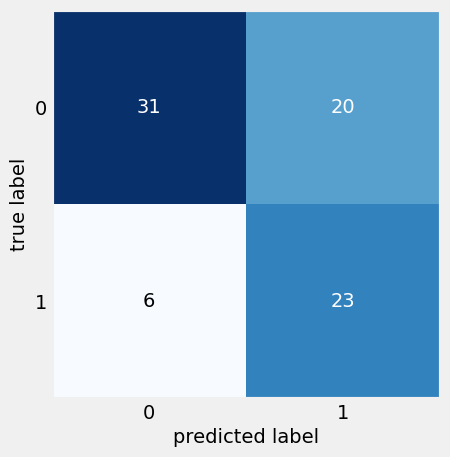

In [49]:

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

knn = KNeighborsClassifier()
knn.fit(X_train,y_train)

knn_acc = accuracy_score(y_test,knn.predict(X_test))
print(f"Training Accuracy of KNN is {accuracy_score(y_train, knn.predict(X_train))}")
print(f"Test Accuracy of KNN is {knn_acc} \n")
print(f"Classification Report :- \n {classification_report(y_test, knn.predict(X_test))}")
fig, ax = plot_confusion_matrix(conf_mat=confusion_matrix(y_test, knn.predict(X_test)))
plt.show()

# Decision Tree Classifier

Training Accuracy of KNN is 1.0
Test Accuracy of KNN is 0.9375 

Classification Report :- 
               precision    recall  f1-score   support

           0       0.94      0.96      0.95        51
           1       0.93      0.90      0.91        29

    accuracy                           0.94        80
   macro avg       0.94      0.93      0.93        80
weighted avg       0.94      0.94      0.94        80



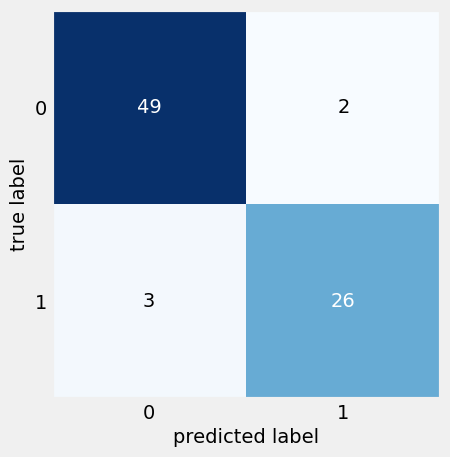

In [50]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(random_state=67)
dtc.fit(X_train,y_train)
dtc_acc = accuracy_score(y_test,dtc.predict(X_test))
print(f"Training Accuracy of KNN is {accuracy_score(y_train, dtc.predict(X_train))}")
print(f"Test Accuracy of KNN is {dtc_acc} \n")
print(f"Classification Report :- \n {classification_report(y_test, dtc.predict(X_test))}")
fig, ax = plot_confusion_matrix(conf_mat=confusion_matrix(y_test, dtc.predict(X_test)))
plt.show()

# Gradient Boost Classifier

Training Accuracy of Gradient Boosting Classifier is 1.0
Test Accuracy of Gradient Boosting Classifier is 0.9625 

Classification Report :- 
               precision    recall  f1-score   support

           0       0.96      0.98      0.97        51
           1       0.96      0.93      0.95        29

    accuracy                           0.96        80
   macro avg       0.96      0.96      0.96        80
weighted avg       0.96      0.96      0.96        80



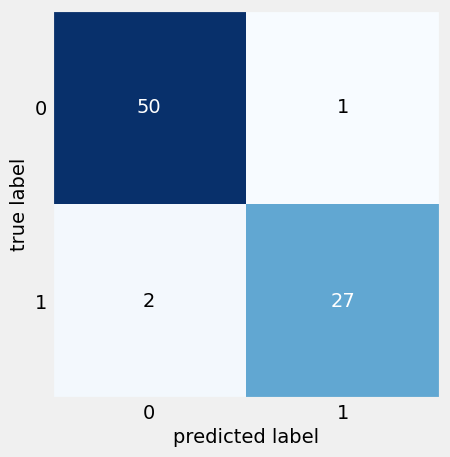

In [51]:
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier(random_state=67)
gb.fit(X_train, y_train)

# accuracy score, confusion matrix and classification report of gradient boosting classifier

gb_acc = accuracy_score(y_test, gb.predict(X_test))

print(f"Training Accuracy of Gradient Boosting Classifier is {accuracy_score(y_train, gb.predict(X_train))}")
print(f"Test Accuracy of Gradient Boosting Classifier is {gb_acc} \n")
print(f"Classification Report :- \n {classification_report(y_test, gb.predict(X_test))}")
fig, ax = plot_confusion_matrix(conf_mat=confusion_matrix(y_test, gb.predict(X_test)))
plt.show()

# Stocastic Gradient Boosting

Training Accuracy of Stochastic Gradient Boosting is 1.0
Test Accuracy of Stochastic Gradient Boosting is 0.9625 

Classification Report :- 
               precision    recall  f1-score   support

           0       0.96      0.98      0.97        51
           1       0.96      0.93      0.95        29

    accuracy                           0.96        80
   macro avg       0.96      0.96      0.96        80
weighted avg       0.96      0.96      0.96        80



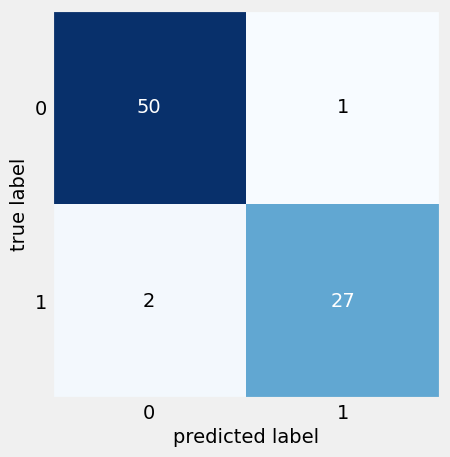

In [52]:
sgb = GradientBoostingClassifier(random_state=67)

sgb.fit(X_train, y_train)

sgb_acc = accuracy_score(y_test, sgb.predict(X_test))

print(f"Training Accuracy of Stochastic Gradient Boosting is {accuracy_score(y_train, sgb.predict(X_train))}")
print(f"Test Accuracy of Stochastic Gradient Boosting is {sgb_acc} \n")
print(f"Classification Report :- \n {classification_report(y_test, sgb.predict(X_test))}")
fig, ax = plot_confusion_matrix(conf_mat=confusion_matrix(y_test, sgb.predict(X_test)))
plt.show()

# Random Forest

Training Accuracy of Random Forest Classifier is 1.0
Test Accuracy of Random Forest Classifier is 0.975 

Classification Report :- 
               precision    recall  f1-score   support

           0       0.96      1.00      0.98        51
           1       1.00      0.93      0.96        29

    accuracy                           0.97        80
   macro avg       0.98      0.97      0.97        80
weighted avg       0.98      0.97      0.97        80



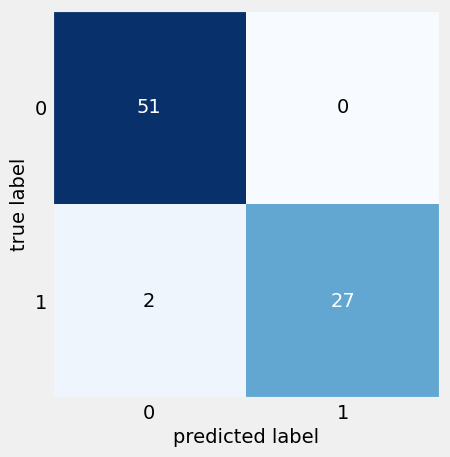

In [53]:
from sklearn.ensemble import RandomForestClassifier
rd_clf = RandomForestClassifier(random_state=67)
rd_clf.fit(X_train, y_train)

rd_clf_acc = accuracy_score(y_test, rd_clf.predict(X_test))
print(f"Training Accuracy of Random Forest Classifier is {accuracy_score(y_train, rd_clf.predict(X_train))}")
print(f"Test Accuracy of Random Forest Classifier is {rd_clf_acc} \n")
print(f"Classification Report :- \n {classification_report(y_test, rd_clf.predict(X_test))}")
fig, ax = plot_confusion_matrix(conf_mat=confusion_matrix(y_test, rd_clf.predict(X_test)))
plt.show()

In [54]:
models = pd.DataFrame({
    'Model' : [ 'KNN', 'Decision Tree Classifier', 'Random Forest Classifier',
             'Gradient Boosting Classifier', 'Stochastic Gradient Boosting',],
    'Accuracy' : [knn_acc, dtc_acc, rd_clf_acc, gb_acc, sgb_acc,]
})

models.sort_values(by = 'Accuracy', ascending = False)

Model  Accuracy
2      Random Forest Classifier    0.9750
3  Gradient Boosting Classifier    0.9625
4  Stochastic Gradient Boosting    0.9625
1      Decision Tree Classifier    0.9375
0                           KNN    0.6750